In [1]:
import numpy as np
import torch
from train_rootspike_glm import train_glm
import matplotlib.pyplot as plt

# Train

In [2]:
base_dir = "/media/hdd01/sklee/"
experiment = "clust4-60"
cell_type = "CA1"

E_neural_file = "Espikes_neural.npy"
I_neural_file = "Ispikes_neural.npy"
V_file = "vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy"
C_syn_e_file = "handsub6_C_syn_e.npy"
C_syn_i_file = "handsub6_C_syn_i.npy"
C_den_file = "handsub6_C_den.npy"
Z_file = "spk_loc.npy"

E_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+E_neural_file)
I_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+I_neural_file)
V = np.load(base_dir+cell_type+"_"+experiment+"/data/"+V_file)[:,:50000].flatten()
C_syn_e = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_e_file)
C_syn_i = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_i_file)
C_den = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_den_file)
Z = np.load(base_dir+cell_type+"_"+experiment+"/data/"+Z_file).flatten()

E_neural = torch.from_numpy(E_neural)
I_neural = torch.from_numpy(I_neural)
C_syn_e = torch.from_numpy(C_syn_e)
C_syn_i = torch.from_numpy(C_syn_i)
V = torch.from_numpy(V)
C_den = torch.from_numpy(C_den)
Z = torch.from_numpy(Z)

In [3]:
model_type = "alpha_rootspike"
T_train = 60 * 1000 * 5
T_test = 10 * 1000 * 5
T_no = 500
save_dir = base_dir+cell_type+"_"+experiment+"/"
device = torch.device("cuda")


if model_type == "alpha_rootspike":
    batch_size = 60000
    iter_no = 10000
    epoch_no = 15
    lr = 0.0025


In [4]:
train_glm(model_type, V, Z, E_neural, I_neural, T_train, T_test,
                T_no, batch_size, iter_no, epoch_no, C_den, C_syn_e, C_syn_i, 
                device, lr, save_dir)

137


0 1.138448715209961e-05 1.7983342409133911 0.6879351139068604
100 0.05192452669143677 1.7049756050109863 0.3107717037200928
200 0.3867701292037964 1.1028047800064087 0.05082247406244278
300 0.4946447014808655 0.9088081121444702 0.020699337124824524
400 0.5492242574691772 0.8106546401977539 0.014528722502291203
500 0.6003903746604919 0.7186398506164551 0.012416994199156761
600 0.6348409056663513 0.6566856503486633 0.011505614034831524
700 0.6619333624839783 0.6079637408256531 0.011088430881500244
800 0.6872092485427856 0.5625087022781372 0.010877072811126709
900 0.7083783149719238 0.5244392156600952 0.010759619064629078
1000 0.7264412641525269 0.49195557832717896 0.010493498295545578
1100 0.7452077865600586 0.45820677280426025 0.010347743518650532
1200 0.7603243589401245 0.43102189898490906 0.010252767242491245
1300 0.7733170986175537 0.4076562821865082 0.010186937637627125
1400 0.7859511971473694 0.3849356174468994 0.010127820074558258
1500 0.7972181439399719 0.3646737337112427 0.01008

In [5]:
output = np.load("/media/hdd01/sklee/"+cell_type+"_"+experiment+"/"+model_type+"_sub6_output.npz")

In [6]:
test = output["test"]
#C_syn_e = output["C_syn_e"]
#C_syn_i = output["C_syn_i"]
filters = output["filters"]

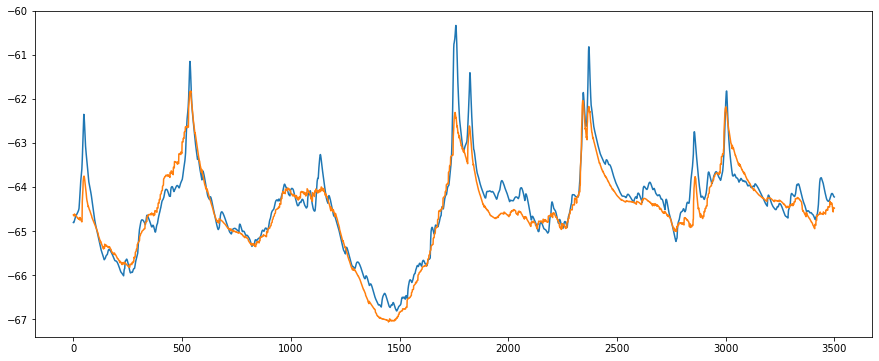

In [10]:
plt.figure(figsize = (15,6))
plt.plot(V[T_train:T_train+T_test][15000:30000][1500:5000])
plt.plot(test[15000:30000][1500:5000])

(26, 500)


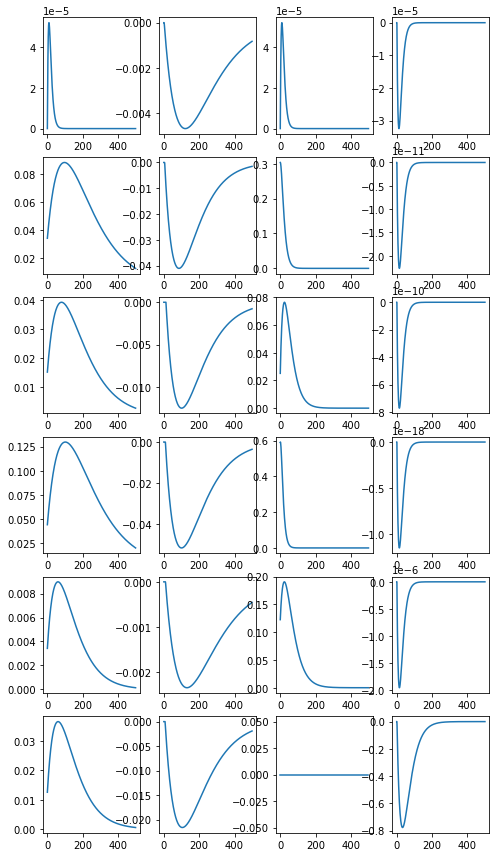

In [8]:
sub_no = 6
print(filters.shape)

fig, axs = plt.subplots(nrows=sub_no, ncols=4, figsize = (8,15))
for i in range(sub_no):
    axs[i,0].plot(filters[i])
    axs[i,1].plot(filters[sub_no+i])
    axs[i,2].plot(filters[2*sub_no+i])
    axs[i,3].plot(filters[3*sub_no+i])
    #axs[i,2].plot(filters[sub_no*2+i])

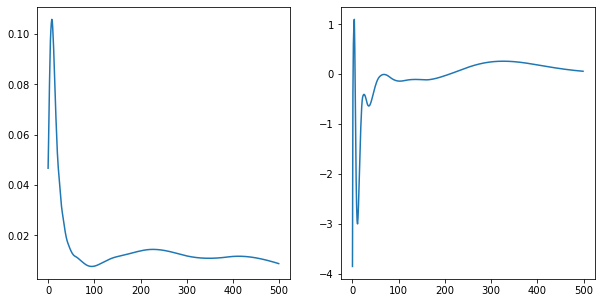

In [9]:
fig, axs = plt.subplots(ncols=2, figsize = (10,5))
axs[0].plot(filters[-2][:500])
axs[1].plot(filters[-1][:500])